In [1]:
import math
import numpy as np
from PIL import Image
from math import log10, sqrt
import os
import cv2
import torch
from torchvision.transforms import functional as trans_fn
import matplotlib.pyplot as plt
# Path to the directory
loc = "cosine3/test"
path = "experiments/"+loc+"/results/hr"
image_folder = path
size = 16
resample = Image.Resampling.BICUBIC
def img2array(image_folder):
    # Get all image file names in the folder
    image_files = os.listdir(image_folder)
    # List to store all image tensors
    images = []
    for image_file in image_files:
        # Build complete image path
        image_path = os.path.join(image_folder, image_file)
        
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        #print("IMG",img.shape)
        # Convert the image from BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Convert the numpy array to torch tensor and add channel dimension
        img_tensor = torch.from_numpy(img.transpose(2, 0, 1))
        img_tensor = trans_fn.resize(img_tensor, size, resample).numpy()
        # Add the image tensor to the list
        images.append(img_tensor)

    # Stack all image tensors together along a new dimension
    images_tensor = np.stack(images)
    return images_tensor

c:\Users\Eachann\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(11, 3, 16, 16)


c:\Users\Eachann\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


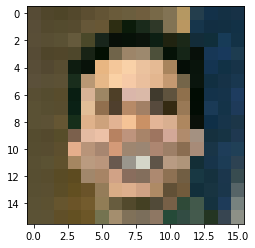

In [2]:
ind = 2
images_tensor = img2array(image_folder)
print(images_tensor.shape)
plt.imshow(images_tensor[ind].transpose(1, 2, 0))

(11, 3, 16, 16)


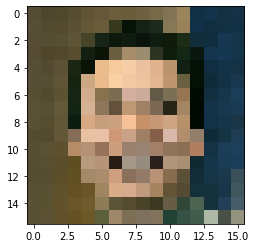

In [3]:
image_folder2 =  "experiments/"+loc+"/results/sr"
images_tensor2 = img2array(image_folder2)
print(images_tensor2.shape)
plt.imshow(images_tensor2[ind].transpose(1, 2, 0))

In [4]:
def resize(img,size,resample):
        img = trans_fn.resize(img, size, resample)
        return img
# Open the image form working directory
def calculate_consistency(img1, img2):
        return

In [5]:
mse = ((images_tensor - images_tensor2)**2).mean()
print(mse)
#plt.imshow(mse[ind].transpose(1, 2, 0))
#plt.show()

53.300662878787875
